In [ ]:
import pandas as pd              # for handling data
import numpy as np               # for math operations
import matplotlib.pyplot as plt  # for charts
import seaborn as sns            # for prettier charts

In [2]:
vgsales_df = pd.read_csv("E:/Analytics PDF/Video Game Sales and Engagement Analysis/vgsales.csv")  
games_df = pd.read_csv("E:/Analytics PDF/Video Game Sales and Engagement Analysis/games.csv")

games_df.head(5)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [3]:
# Remove duplicates
games_df = games_df.drop_duplicates(subset=['Title', 'Release Date'])
vgsales_df = vgsales_df.drop_duplicates(subset=['Name', 'Platform', 'Year'])

# Standardize text
games_df['Title'] = games_df['Title'].str.strip().str.title()
vgsales_df['Name'] = vgsales_df['Name'].str.strip().str.title()

games_df['Genres'] = games_df['Genres'].astype(str).str.replace('/', ',').str.replace(';', ',')
games_df['Genres'] = games_df['Genres'].str.title().str.strip()
games_df.head(5)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'Rpg']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'Rpg']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend Of Zelda: Breath Of The Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'Rpg']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'Rpg', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
# Games---

games_df.duplicated().sum()
games_df.duplicated(subset=['Title']).sum()
games_df = games_df.drop_duplicates()
games_df.isnull().sum()

# Engagement
for col in ['Plays', 'Wishlist', 'Backlogs']:
    #games_df[col] = pd.to_numeric(games_df[col], errors='coerce').fillna(0)
    games_df[col] = games_df[col].fillna(0)

# Ratings
games_df['Rating'] = pd.to_numeric(games_df['Rating'], errors='coerce')
games_df['Rating'] = games_df['Rating'].fillna(games_df['Rating'].median())

'''cols = ['Plays', 'Wishlist', 'Backlogs']
for col in cols:
    games_df[col] = games_df[col].fillna(0)'''

games_df['Release Date'] = pd.to_datetime(games_df['Release Date'], errors='coerce')
games_df['Release_Year'] = games_df['Release Date'].dt.year.fillna(0).astype(int)

games_df['Genres'].value_counts()

games_df['Genres'] = (
    games_df['Genres']
    .str.replace('/', ',')
    .str.replace(';', ',')
    .str.replace('[', '')
    .str.replace(']', '')
    .str.replace('@',',')
    .str.split(',')
)

#games_df['Genres'] = games_df['Genres'].str.split(',')
games_df = games_df.explode('Genres')
games_df['Genres'] = games_df['Genres'].str.strip().str.title()
games_df.head(5)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release_Year
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,'Adventure',"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K,2022
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,'Rpg',"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K,2022
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,'Adventure',A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K,2019
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,'Brawler',A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K,2019
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,'Indie',A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K,2019


In [5]:
'''valid_genres = ['Action', 'Adventure', 'RPG', 'Shooter', 'Sports', 'Racing', 'Indie', 'Arcade', 'Music',
                'Strategy', 'Simulatior', 'Puzzle', 'Card and Board Game','Platform','Fighting']

games_df = games_df[games_df['Genres'].isin(valid_genres)]'''


"valid_genres = ['Action', 'Adventure', 'RPG', 'Shooter', 'Sports', 'Racing', 'Indie', 'Arcade', 'Music',\n                'Strategy', 'Simulatior', 'Puzzle', 'Card and Board Game','Platform','Fighting']\n\ngames_df = games_df[games_df['Genres'].isin(valid_genres)]"

In [6]:
# Sales

sales_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for col in sales_cols:
    vgsales_df[col] = pd.to_numeric(vgsales_df[col], errors='coerce').fillna(0)
    #vgsales_df[col] = vgsales_df[col].fillna(0)

vgsales_df['Publisher'] = vgsales_df['Publisher'].fillna('Unknown')
vgsales_df['Year'] = pd.to_numeric(vgsales_df['Year'], errors='coerce').fillna(0).astype(int)

vgsales_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
'''sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in sales_cols:
    vgsales_df[col] = vgsales_df[col].fillna(0)

vgsales_df.head(5)'''

# VG Sales dataset
vgsales_df['Genre'] = vgsales_df['Genre'].str.split(',')

genre_map = {
    'Simulation': 'Simulator',
    'Role-Playing': 'Rpg',
    'Misc': 'Music'
}

vgsales_df['Genre'] = vgsales_df['Genre'].apply(
    lambda x: [genre_map.get(i.strip(), i.strip()).title() for i in x]
)

vgsales_df = vgsales_df.explode('Genre')
vgsales_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Rpg,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
merged_df = pd.merge(
    games_df,
    vgsales_df,
    left_on='Title',
    right_on='Name',
    how='inner'
)


In [9]:
merged_df.drop(columns=[
    'Release Date', 
    'Name'
], inplace=True, errors='ignore')

merged_df.head(5)


,Unnamed: 0,Title,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,73,X360,2013,Music,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,169,PS3,2014,Music,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,298,PS4,2014,Music,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,644,XOne,2014,Music,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,715,PSV,2014,Music,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25


In [10]:
merged_df.columns = [
    col.lower()
    .replace(' ', '_')
    .replace('-', '_')
    for col in merged_df.columns
]


In [11]:
#Text to Numeric Form

int_cols = ['release_day', 'year']
float_cols = ['rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
date_cols = ['release_year', 'year']
#numeric_cols = ['Plays', 'Wishlist', 'Backlogs']

for col in int_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].astype(int)

for col in float_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].astype(float)
         
'''for col in numeric_cols:   
    if col in merged_df.colunm:
        merged_df[col] = merged_df[col].astype(int)'''
        
'''for col in date_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].dt.year'''
        
merged_df.head(5)
#print(merged_df.info())

,unnamed:_0,title,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,...,rank,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,73,X360,2013,Music,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,169,PS3,2014,Music,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,298,PS4,2014,Music,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,644,XOne,2014,Music,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,715,PSV,2014,Music,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25


In [12]:
def clean_text(val):
    if isinstance(val, str):
        val = val.encode("utf-8", "ignore").decode("utf-8")
        val = val.replace('\n', ' ').replace('\r', ' ')
    return val

merged_df = merged_df.applymap(clean_text)

def force_ascii(x):
    if isinstance(x, str):
        return x.encode('ascii', 'ignore').decode('ascii')
    return x

merged_df = merged_df.applymap(force_ascii)

merged_df.to_csv(
    "games_mysql_ready.csv",
    index=False,
    encoding="utf-8-sig",
    sep=",",
    quoting=1
)

merged_df.head(5)

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\4256287456.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(clean_text)
C:\Users\visha\AppData\Local\Temp\ipykernel_27092\4256287456.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(force_ascii)


,unnamed:_0,title,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,...,rank,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,73,X360,2013,Music,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,169,PS3,2014,Music,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,298,PS4,2014,Music,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,644,XOne,2014,Music,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,5,Minecraft,['Mojang Studios'],4.3,2.3K,2.3K,'Adventure',Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,...,715,PSV,2014,Music,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25


In [13]:
merged_df.isnull().sum().sum()        # should be small or zero
merged_df.dtypes                     # no object lists
merged_df.shape

(2103, 24)

# Exploratory Data Analysis (EDA)

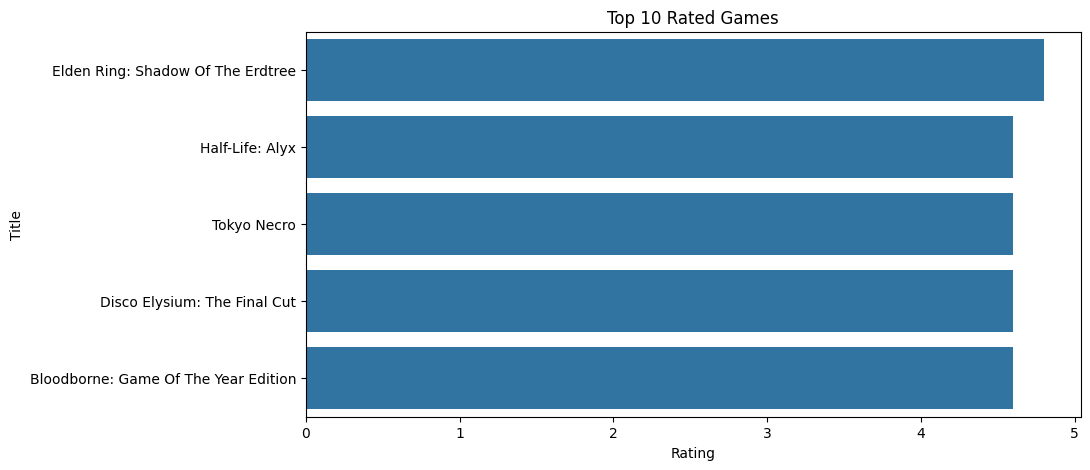

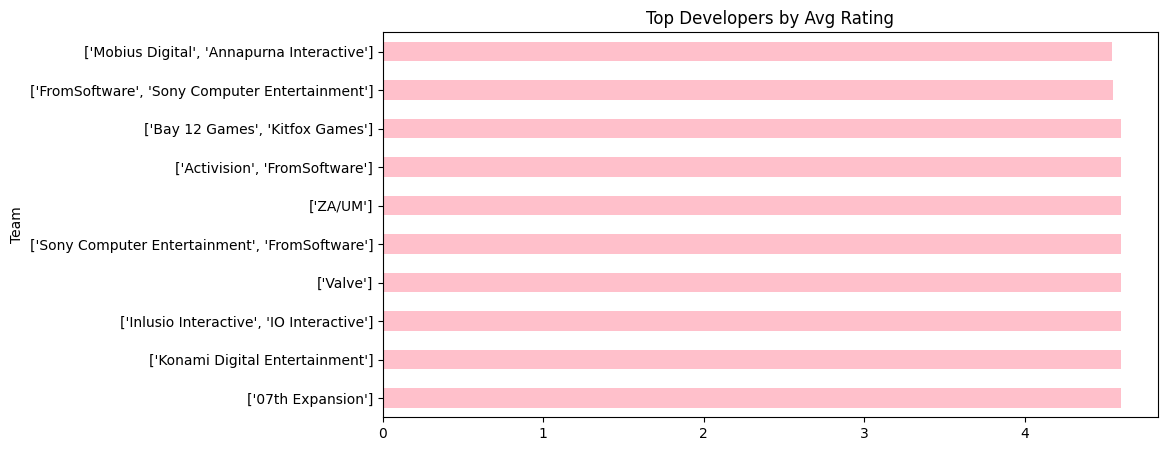

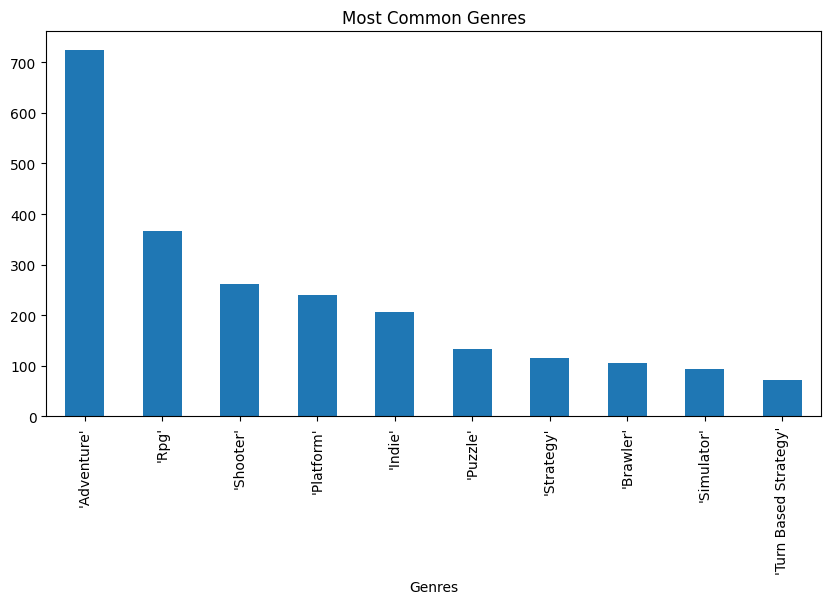

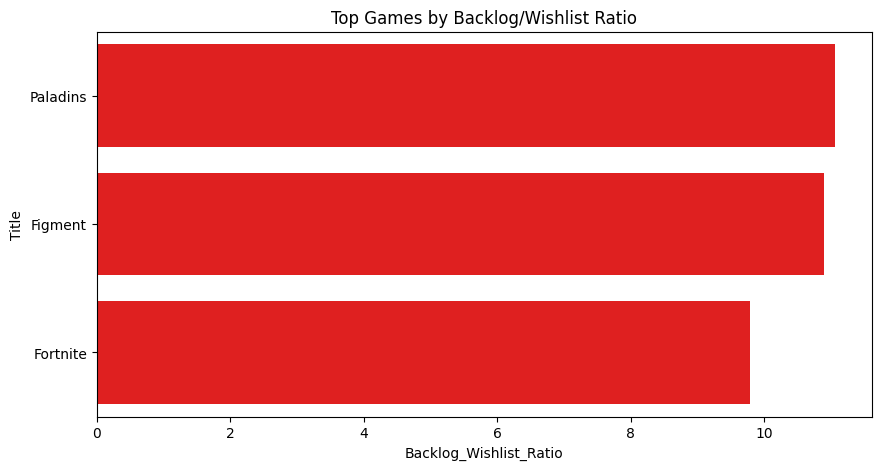

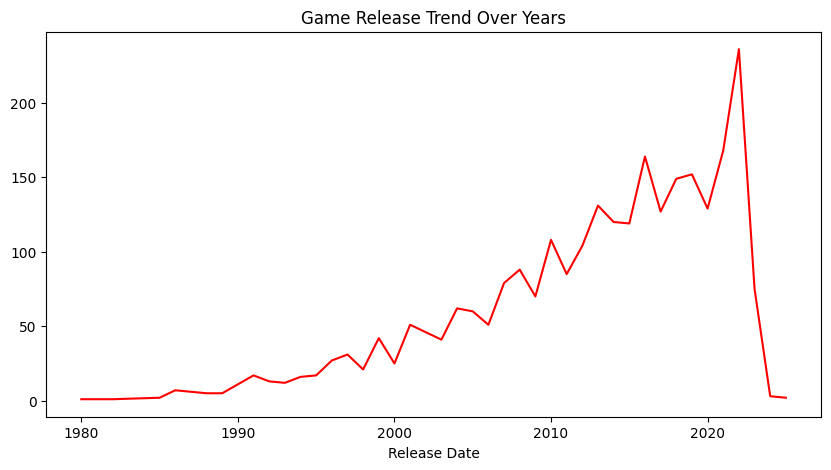

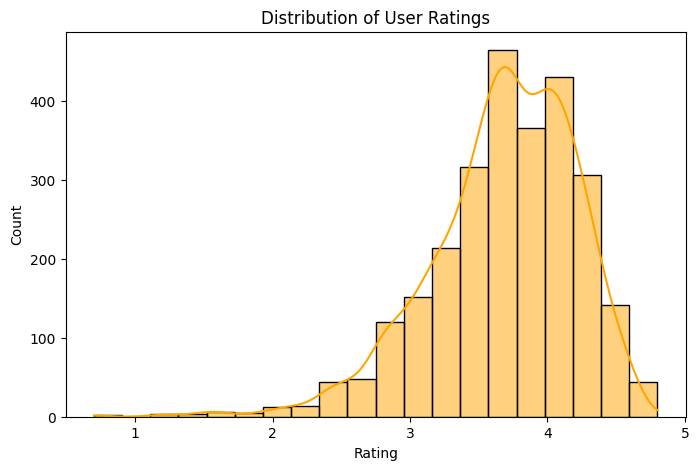

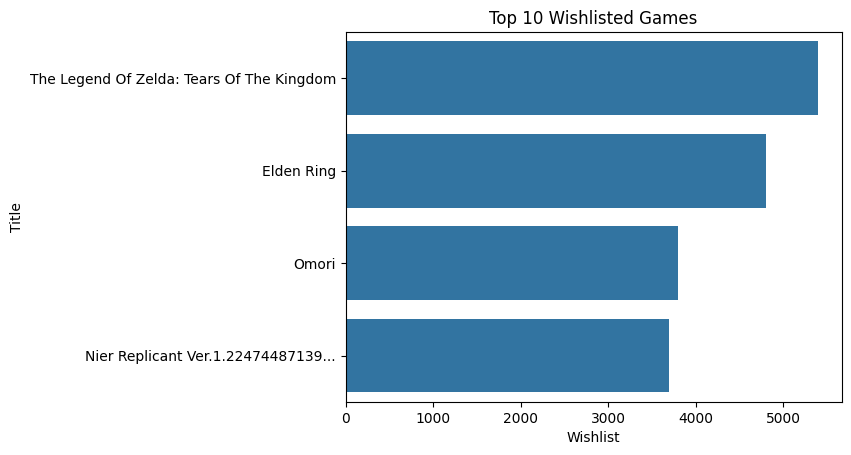

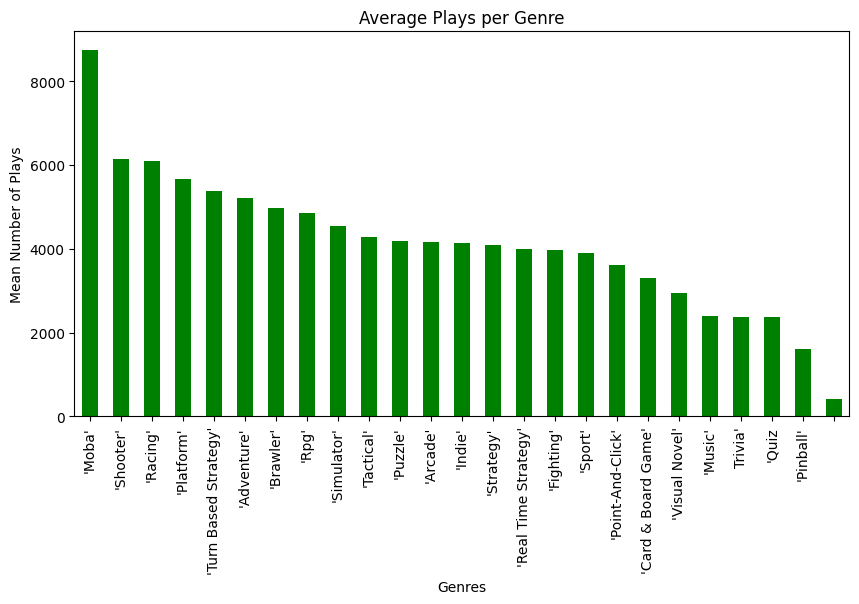

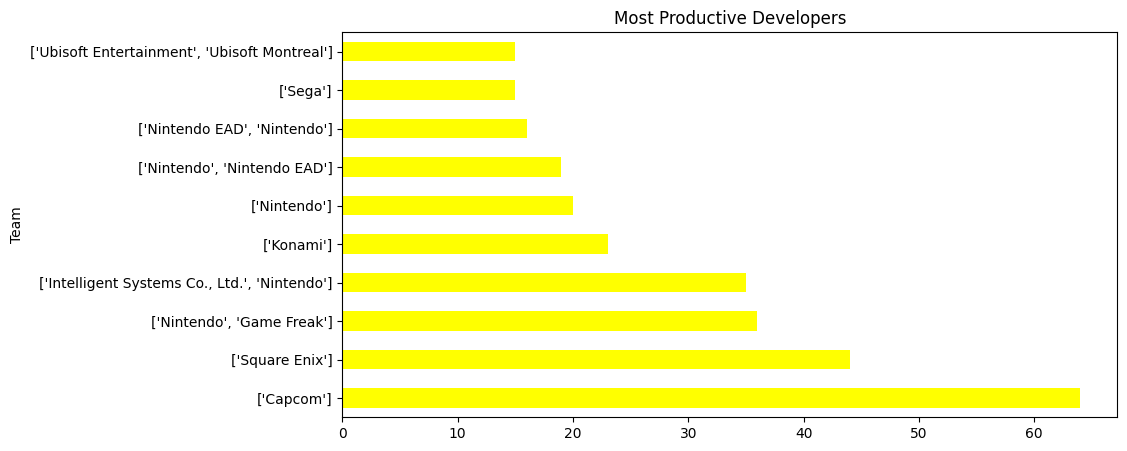

In [14]:
# -- Games Analysis

# Top-rated games
top_rated = games_df[['Title','Rating']].sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_rated, x='Rating', y='Title')
plt.title("Top 10 Rated Games")
plt.show()

# Developers with highest avg ratings
dev_ratings = games_df.groupby('Team')['Rating'].mean().sort_values(ascending=False).head(10)
dev_ratings.plot(kind='barh', figsize=(10,5), title="Top Developers by Avg Rating",color="Pink")
plt.show()

# Most common genres
genre_counts = games_df['Genres'].value_counts().head(10)
genre_counts.plot(kind='bar', figsize=(10,5), title="Most Common Genres")
plt.show()

# Backlog vs Wishlist ratio
#Convert columns to numeric (coerce turns non-numeric text into NaN/int)
def convert_k_to_num(x):
    if isinstance(x, str):
        x = x.lower().strip()
        if 'k' in x:
            return float(x.replace('k', '')) * 1000
    return pd.to_numeric(x, errors='coerce')

# Apply to your column
games_df['Backlogs'] = games_df['Backlogs'].apply(convert_k_to_num)
games_df['Wishlist'] = games_df['Wishlist'].apply(convert_k_to_num)

#games_df['Backlogs'] = pd.to_numeric(games_df['Backlogs'], errors='coerce').fillna(0)
#games_df['Wishlist'] = pd.to_numeric(games_df['Wishlist'], errors='coerce').fillna(0)

games_df['Backlog_Wishlist_Ratio'] = games_df['Backlogs'] / (games_df['Wishlist']+1)
ratio_top = games_df[['Title','Backlog_Wishlist_Ratio']].sort_values(by='Backlog_Wishlist_Ratio', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=ratio_top, x='Backlog_Wishlist_Ratio', y='Title', color="Red")
plt.title("Top Games by Backlog/Wishlist Ratio")
plt.show()

# Release trend
games_df['Release Date'] = pd.to_datetime(
    games_df['Release Date'],
    errors='coerce'
)

release_trend = games_df['Release Date'].dt.year.value_counts().sort_index()
release_trend.plot(kind='line', figsize=(10,5), title="Game Release Trend Over Years", color="Red")
plt.show()

# Distribution of ratings
plt.figure(figsize=(8,5))
sns.histplot(games_df['Rating'], bins=20, kde=True, color="Orange")
plt.title("Distribution of User Ratings")
plt.show()

# Top 10 wishlisted games
top_wishlist = games_df[['Title','Wishlist']].sort_values(by='Wishlist', ascending=False).head(10)
sns.barplot(data=top_wishlist, x='Wishlist', y='Title')
plt.title("Top 10 Wishlisted Games")
plt.show()

# Average plays per genre
#Convert 'Plays' to numeric (as coerce turns strings into NaN)

#games_df['Plays'] = pd.to_numeric(games_df['Plays'], errors='coerce')
games_df['Plays'] = games_df['Plays'].apply(convert_k_to_num)
avg_plays = games_df.groupby('Genres')['Plays'].mean().sort_values(ascending=False)
avg_plays.plot(kind='bar', figsize=(10,5), title="Average Plays per Genre", color="Green")
plt.ylabel("Mean Number of Plays")
plt.show()

# Most productive developers
dev_productivity = games_df['Team'].value_counts().head(10)
dev_productivity.plot(kind='barh', figsize=(10,5), title="Most Productive Developers", color = "yellow")
plt.show()


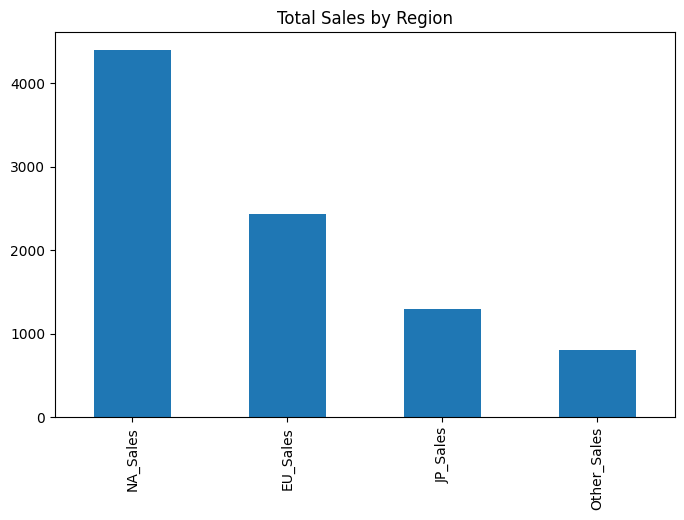

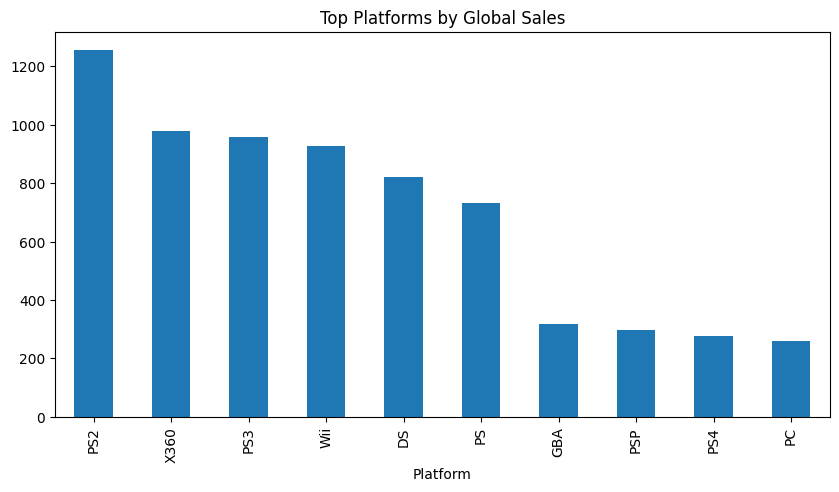

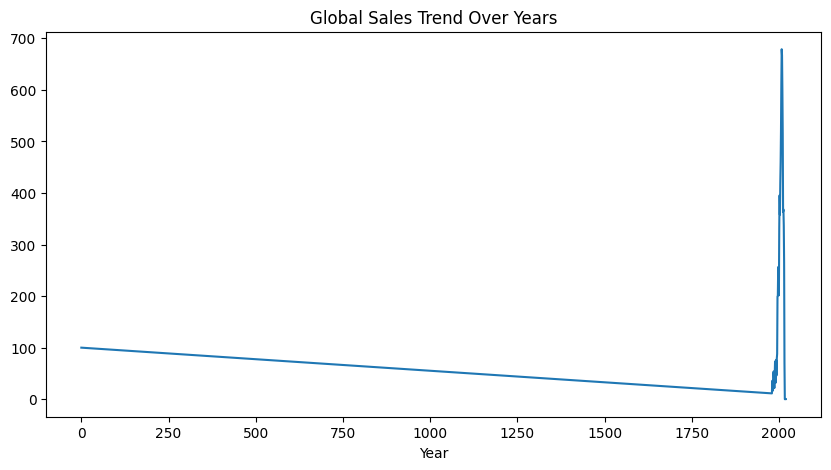

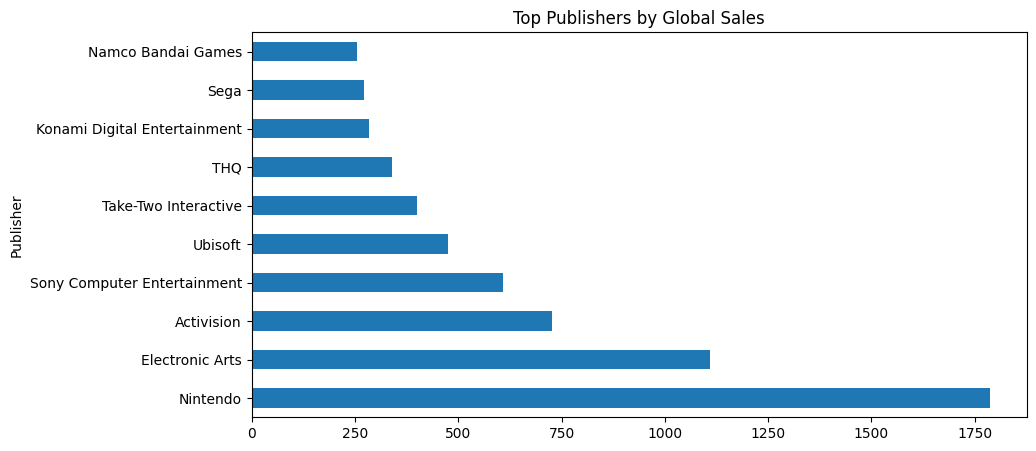

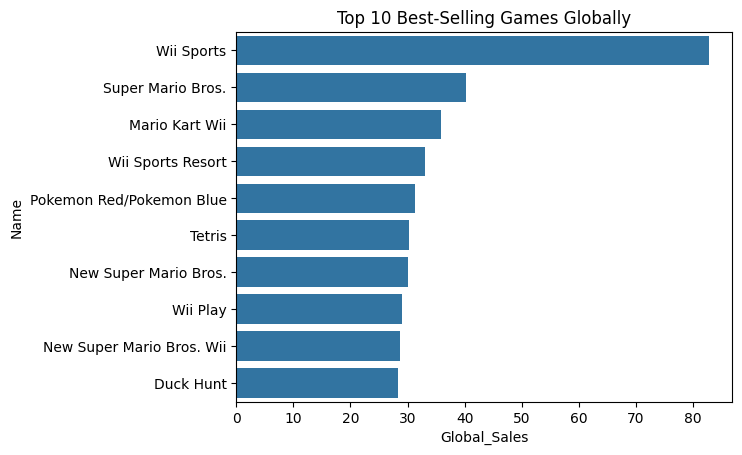

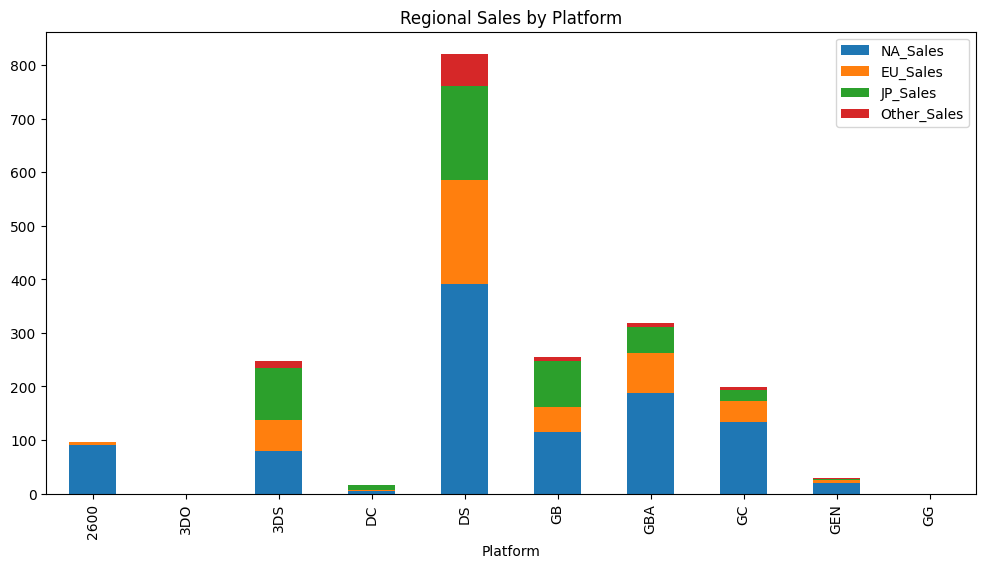

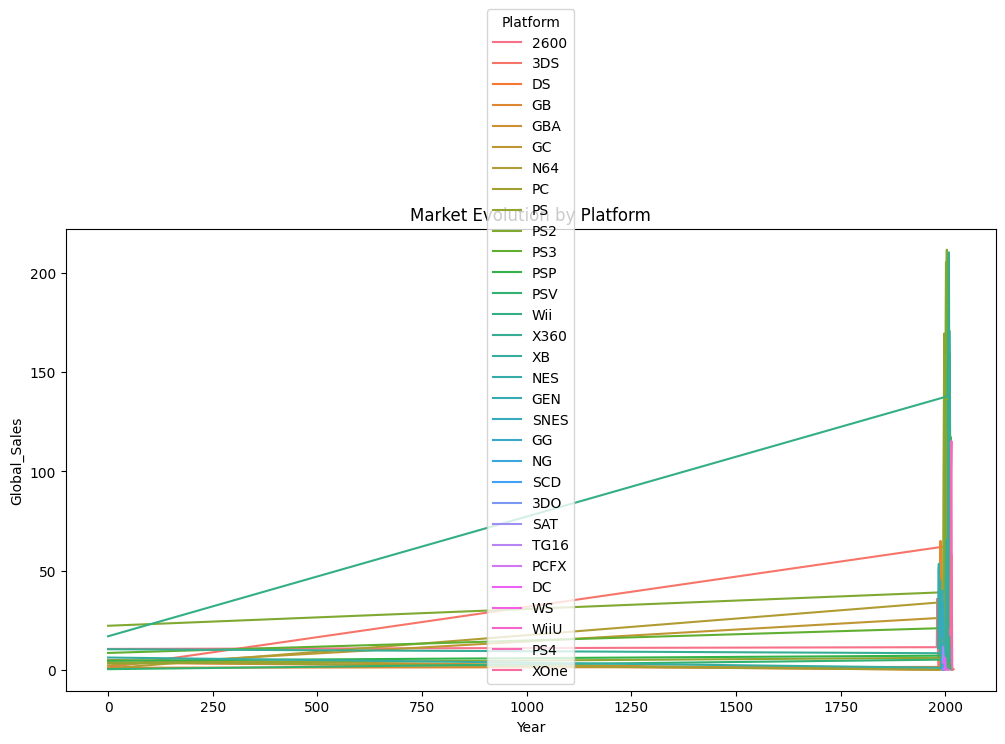

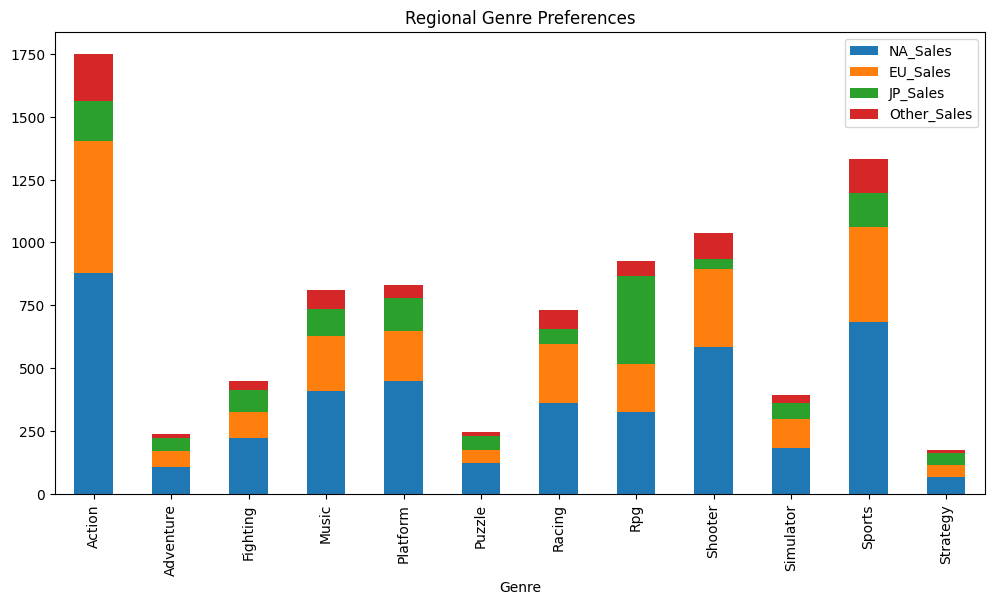

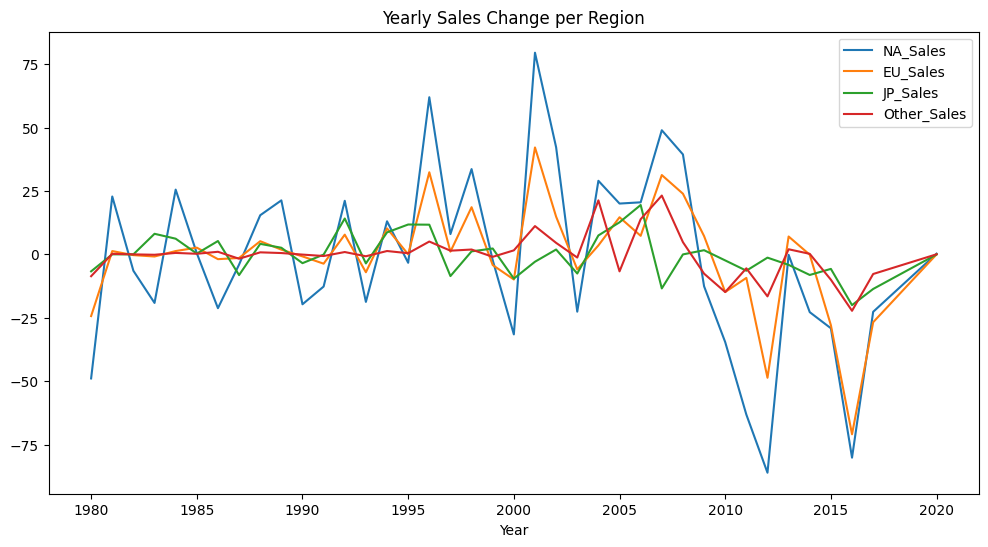

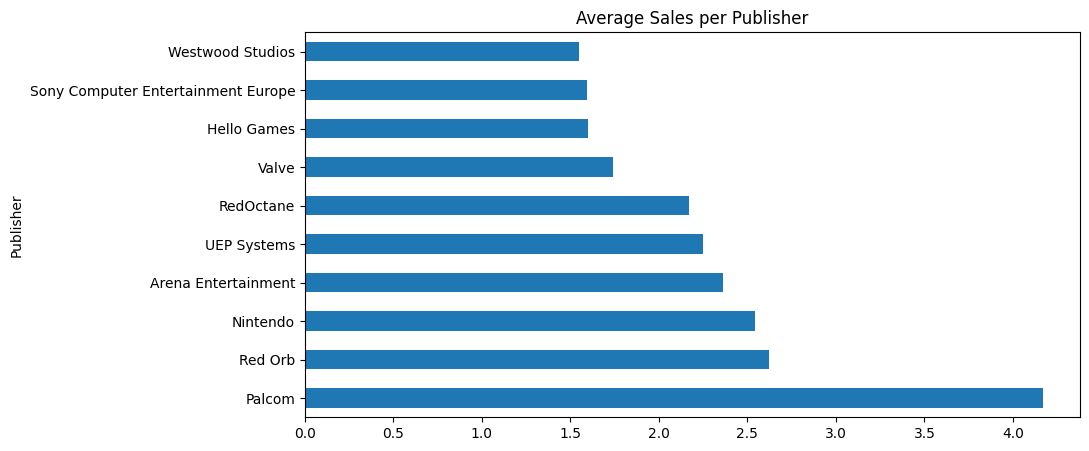

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:62: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_games_platform = vgsales_df.groupby('Platform', group_keys=False).apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True)
C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


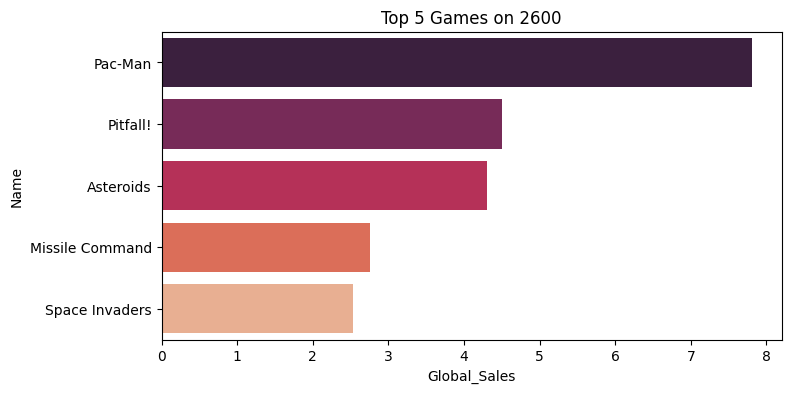

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


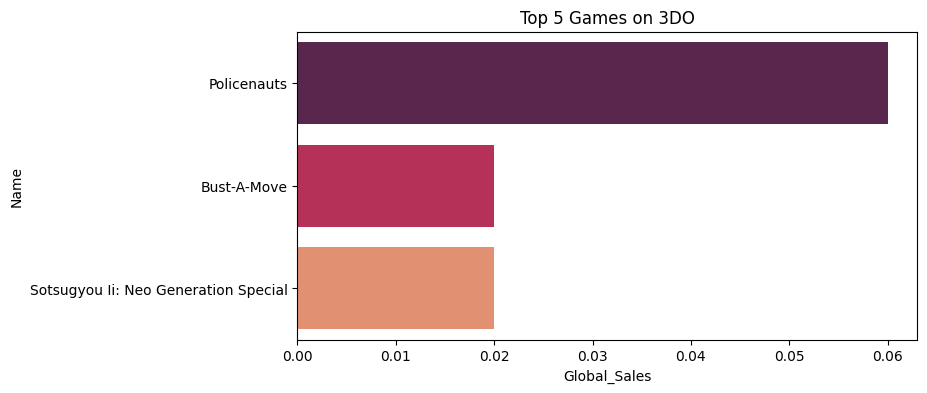

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


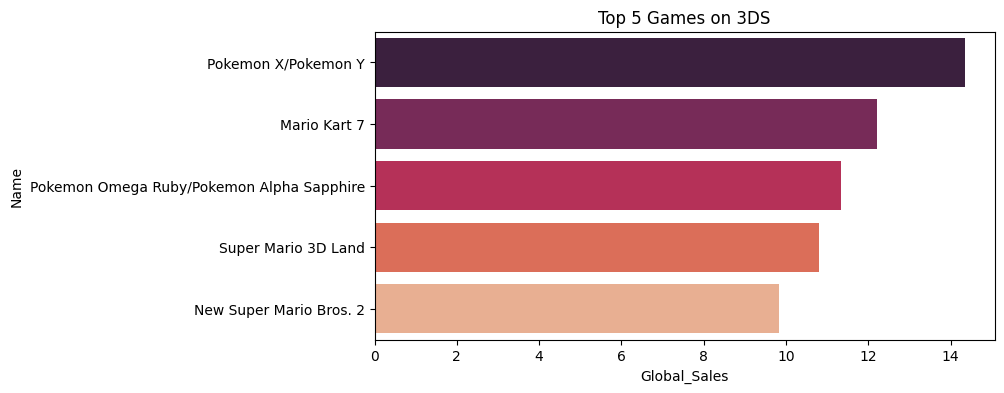

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


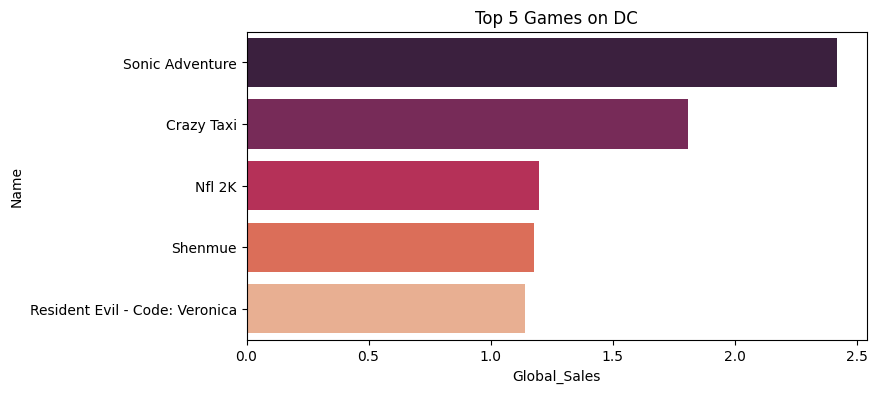

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


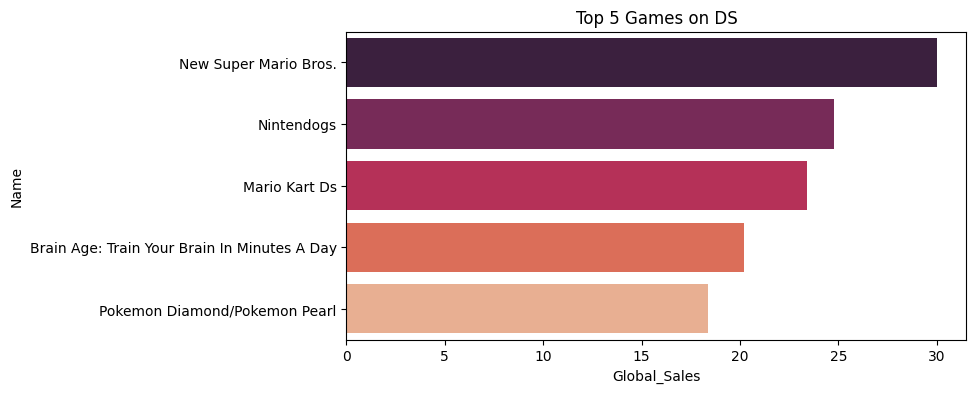

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


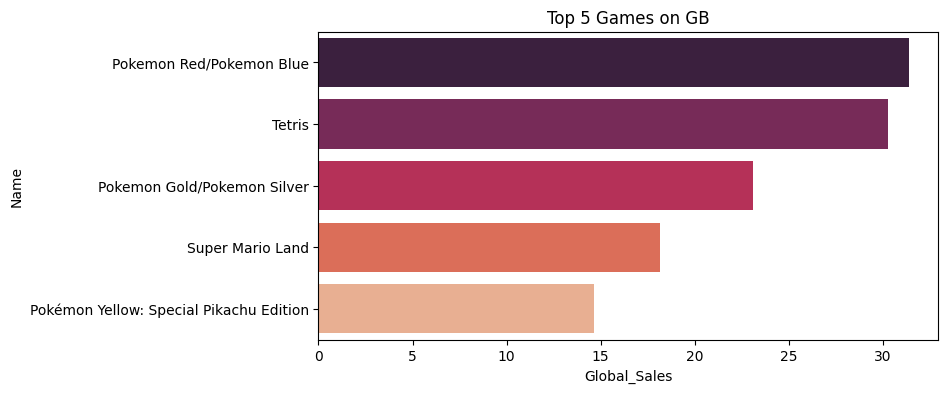

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


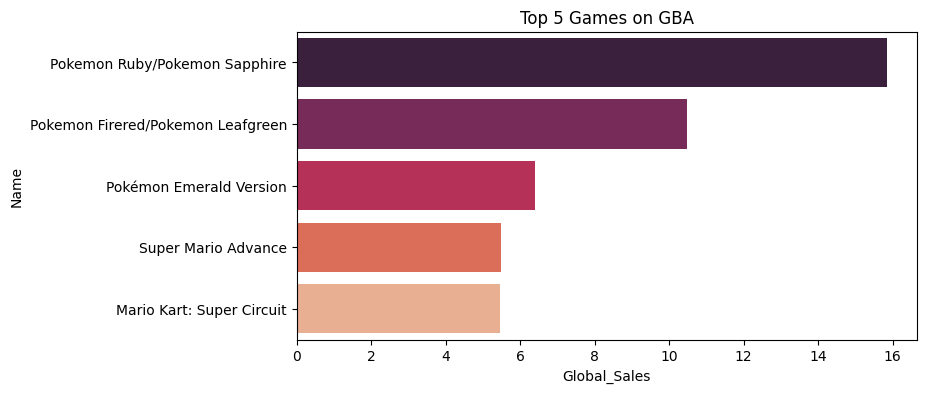

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


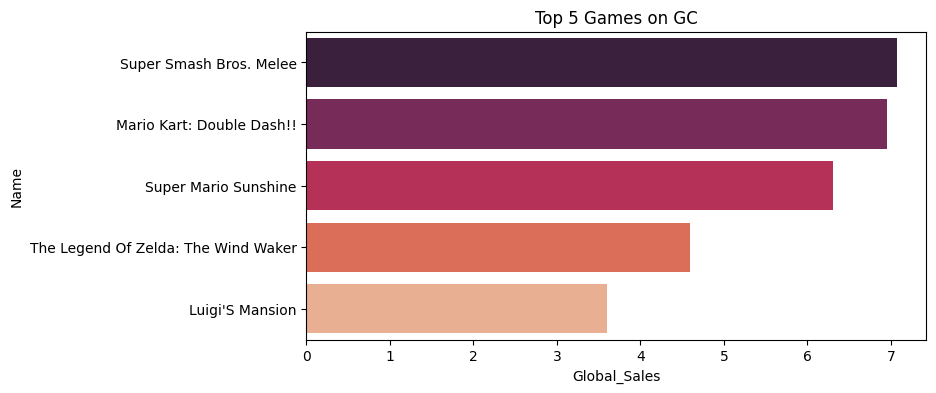

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


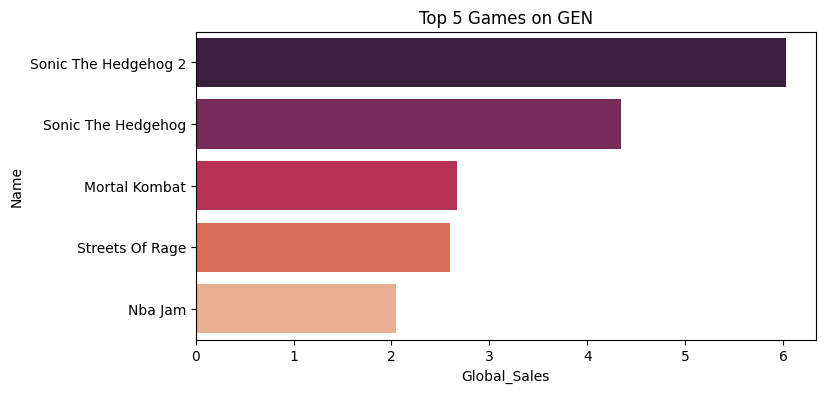

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


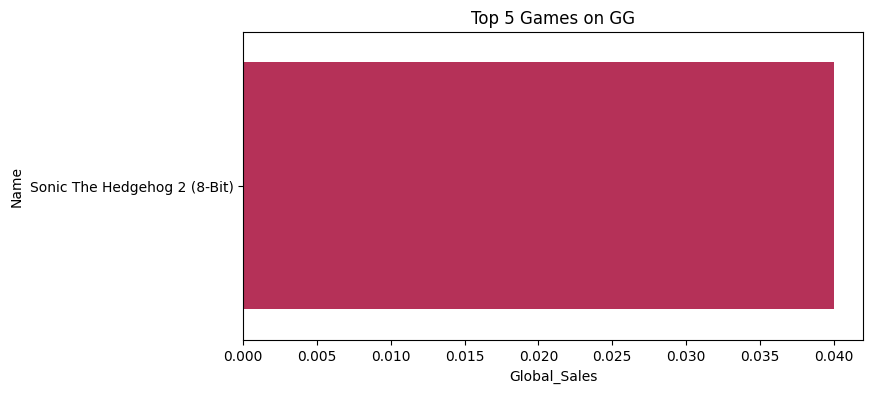

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


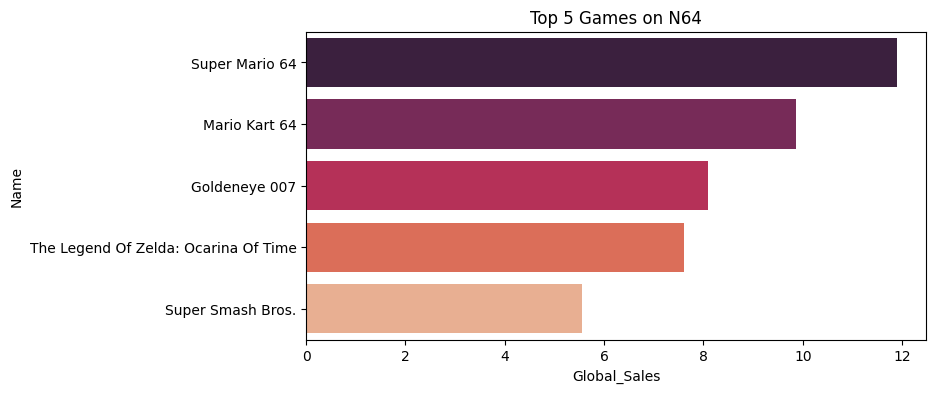

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


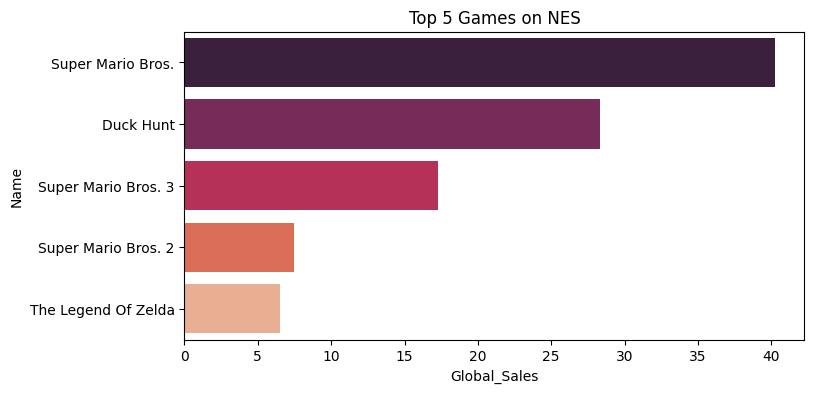

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


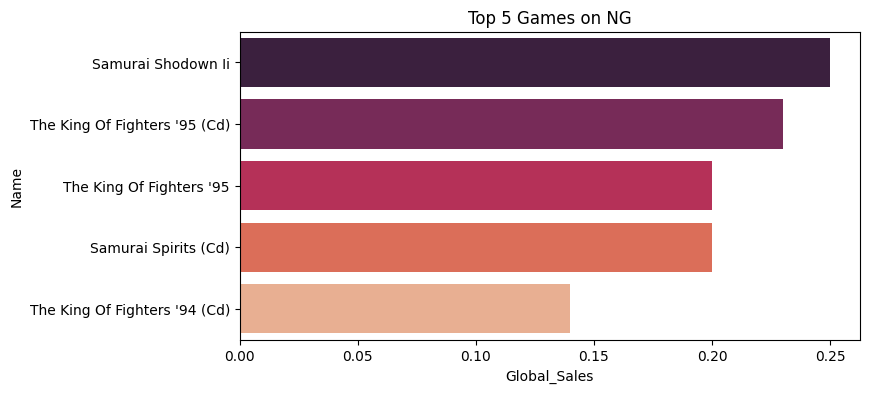

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


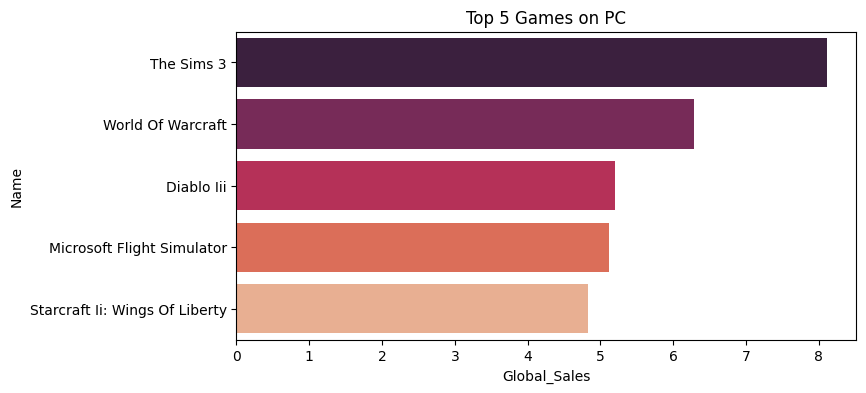

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


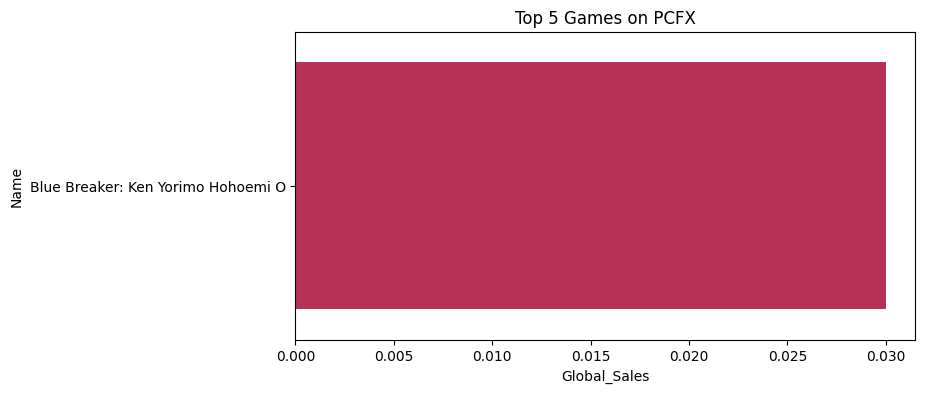

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


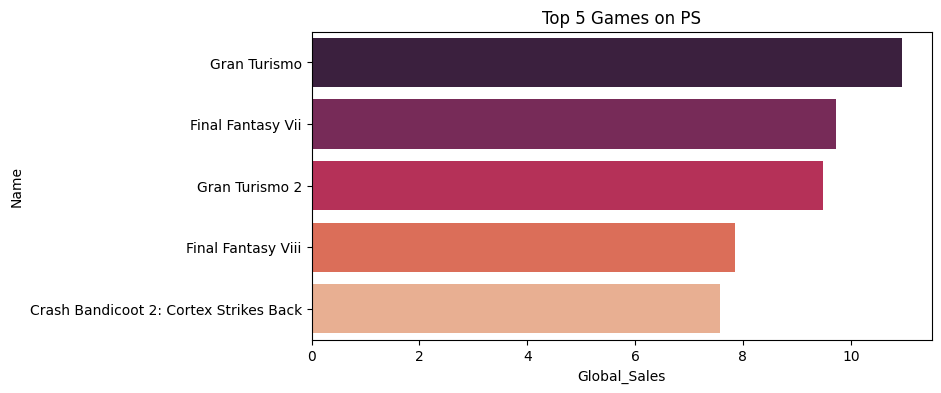

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


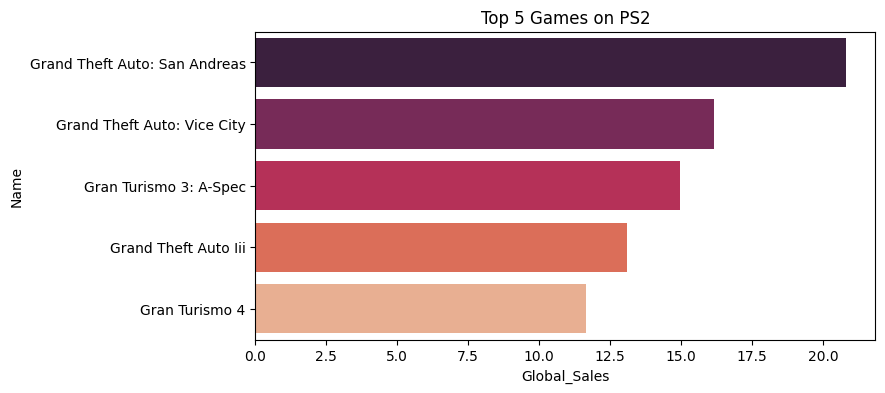

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


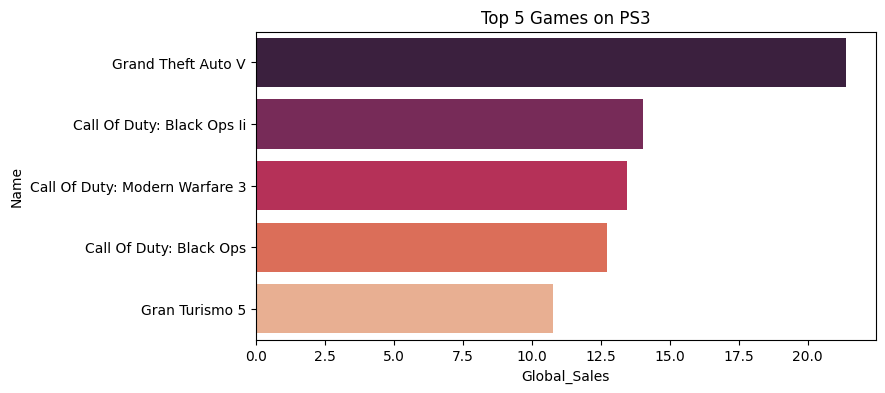

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


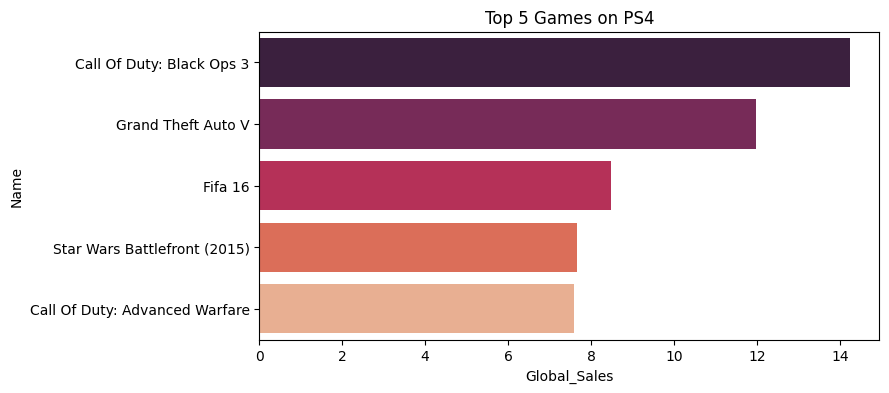

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


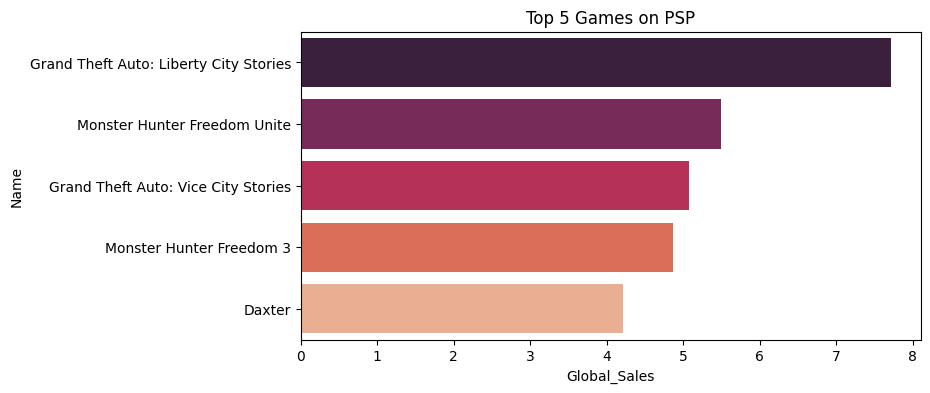

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


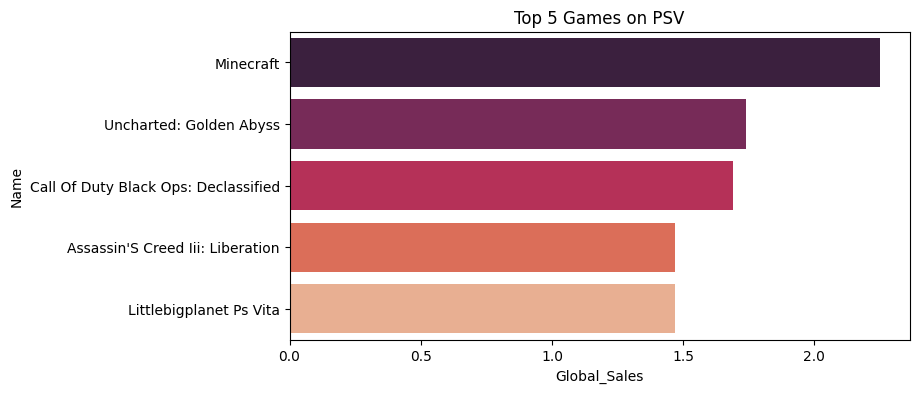

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


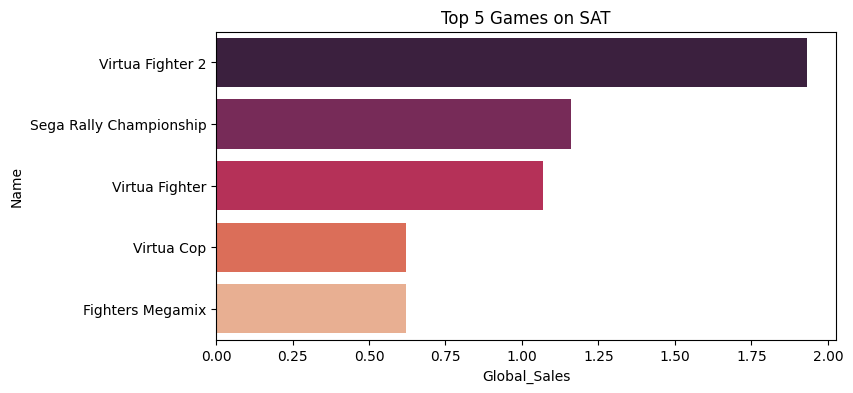

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


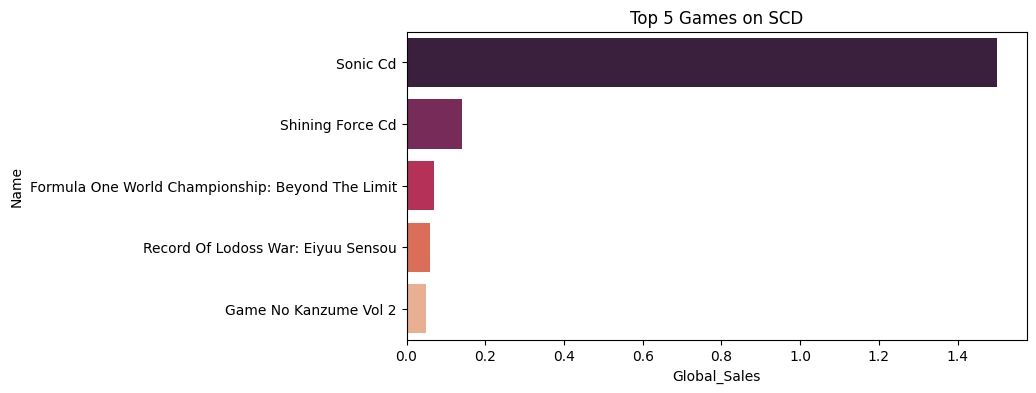

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


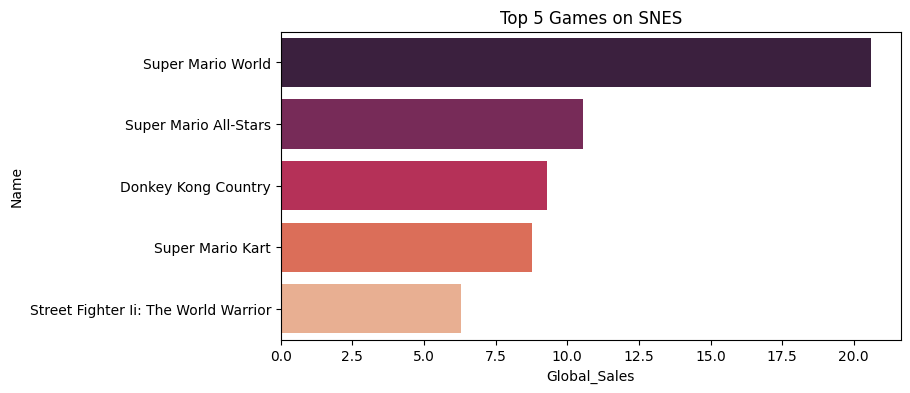

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


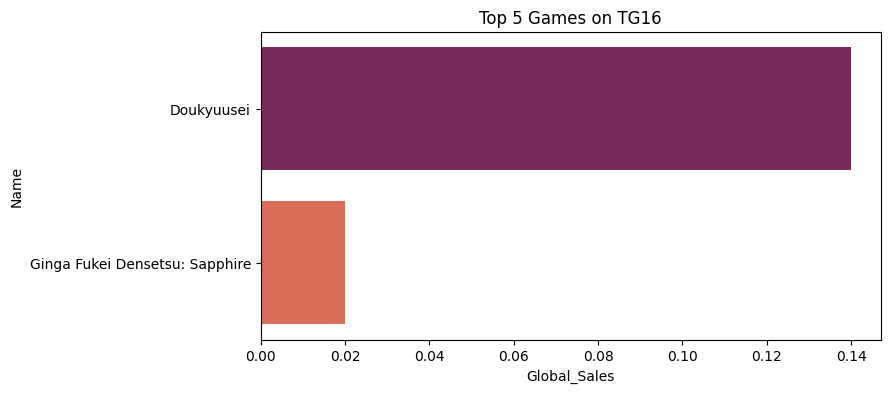

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


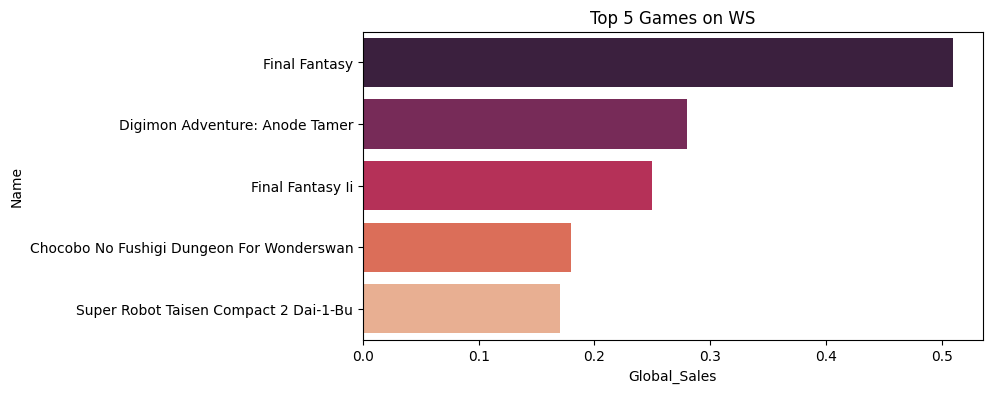

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


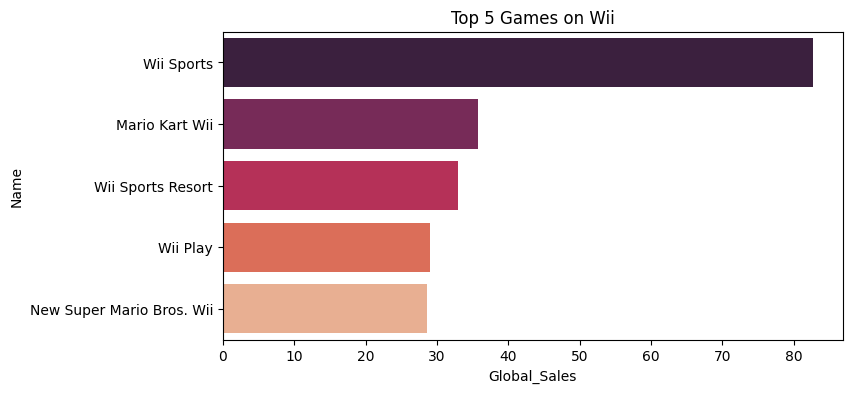

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


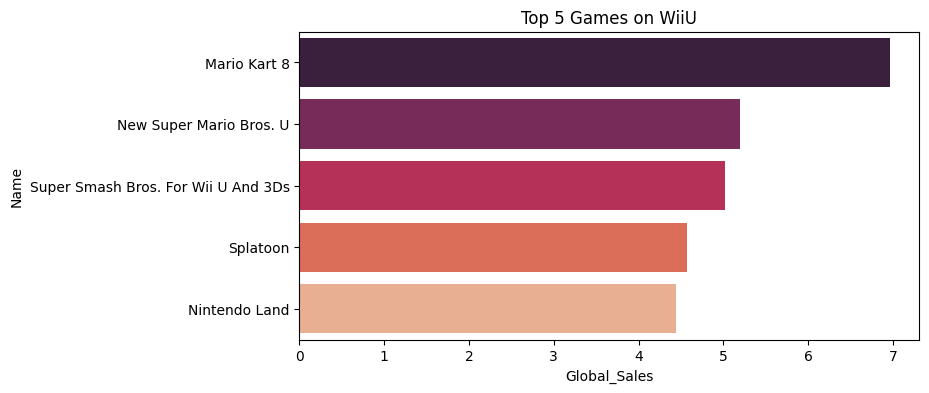

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


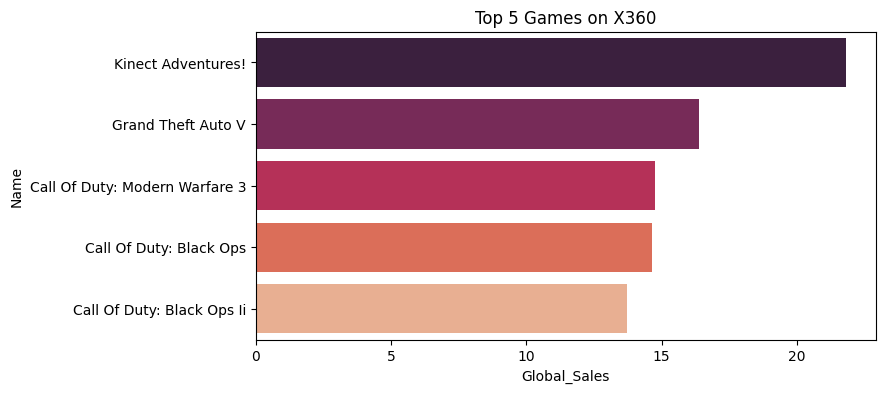

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


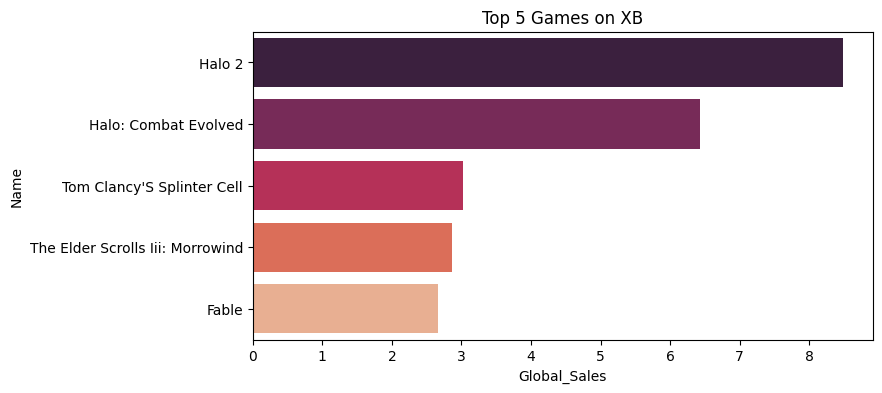

C:\Users\visha\AppData\Local\Temp\ipykernel_27092\3933444751.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')


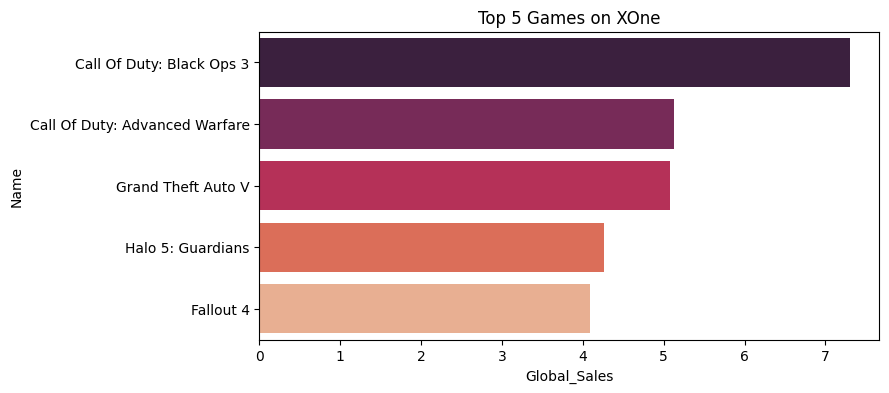

In [15]:
# -- vgsales Analysis

# Region generating most sales
region_sales = vgsales_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_sales.plot(kind='bar', figsize=(8,5), title="Total Sales by Region")
plt.show()

# Best-selling platforms
platform_sales = vgsales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind='bar', figsize=(10,5), title="Top Platforms by Global Sales")
plt.show()

# Trend of releases and sales
sales_trend = vgsales_df.groupby('Year')['Global_Sales'].sum()
sales_trend.plot(kind='line', figsize=(10,5), title="Global Sales Trend Over Years")
plt.show()

# Top publishers
publisher_sales = vgsales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='barh', figsize=(10,5), title="Top Publishers by Global Sales")
plt.show()

# Top 10 best-sellers globally
top_sellers = vgsales_df[['Name','Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
sns.barplot(data=top_sellers, x='Global_Sales', y='Name')
plt.title("Top 10 Best-Selling Games Globally")
plt.show()

# Regional sales comparison per platform
regional_platform = vgsales_df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
regional_platform.head(10).plot(kind='bar', stacked=True, figsize=(12,6), title="Regional Sales by Platform")
plt.show()

# Market evolution by platform
platform_evolution = vgsales_df.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_evolution, x='Year', y='Global_Sales', hue='Platform')
plt.title("Market Evolution by Platform")
plt.show()

# Regional genre preferences
regional_genres = vgsales_df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
regional_genres.plot(kind='bar', stacked=True, figsize=(12,6), title="Regional Genre Preferences")
plt.show()

# Yearly sales change per region
yearly_change = vgsales_df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().diff()
yearly_change.plot(kind='line', figsize=(12,6), title="Yearly Sales Change per Region")
plt.show()

# Average sales per publisher
avg_sales_pub = vgsales_df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
avg_sales_pub.plot(kind='barh', figsize=(10,5), title="Average Sales per Publisher")
plt.show()

# Top 5 best-selling games per platform -----

#Ensure Global_Sales is numeric to prevent math errors
vgsales_df['Global_Sales'] = pd.to_numeric(vgsales_df['Global_Sales'], errors='coerce').fillna(0)

# Get top 5 per platform without creating a messy index
top_games_platform = vgsales_df.groupby('Platform', group_keys=False).apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True)
#using .reset_index(drop=True), flattens the DataFrame back into a standard table.

#Plot each platform's top games
for platform in top_games_platform['Platform'].unique():
    df = top_games_platform[top_games_platform['Platform'] == platform]
    
    plt.figure(figsize=(8,4))
    # Now Seaborn can find 'Global_Sales' because it is a column, not an index
    sns.barplot(data = df, x='Global_Sales', y='Name', palette='rocket')
    plt.title(f"Top 5 Games on {platform}")
    plt.show()


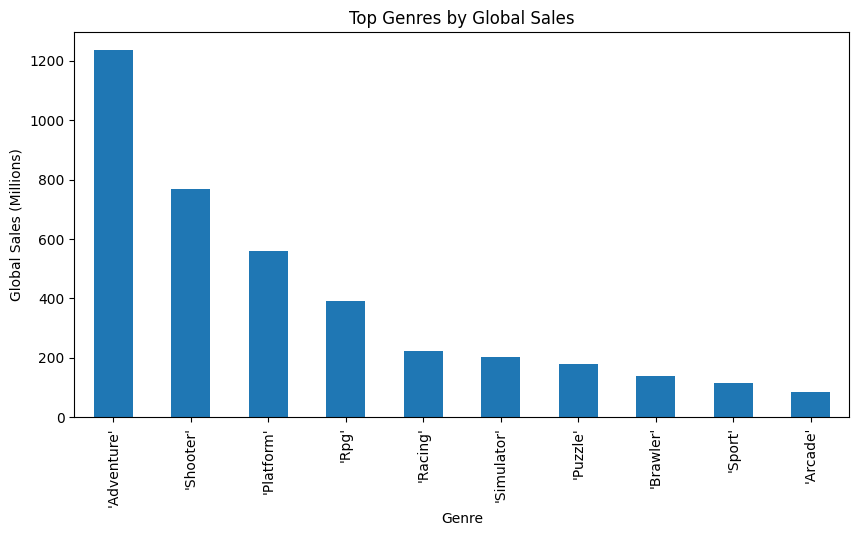

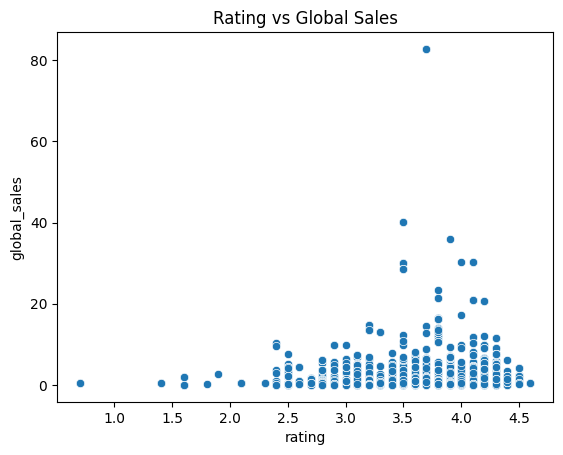

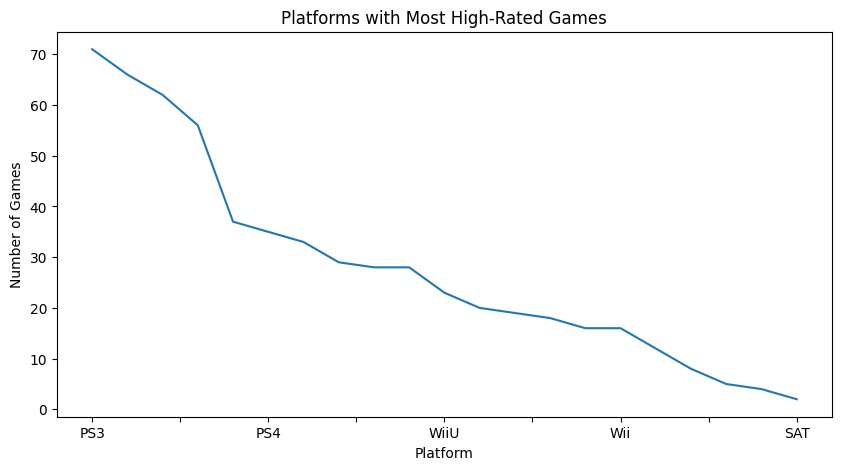

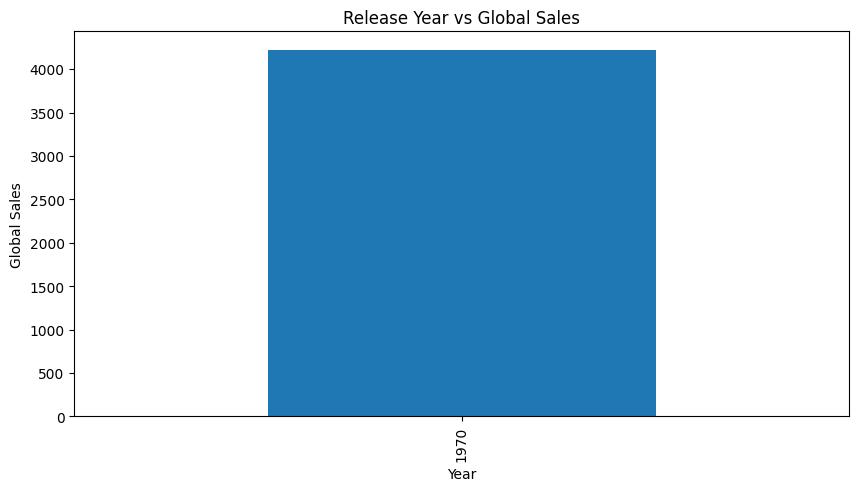

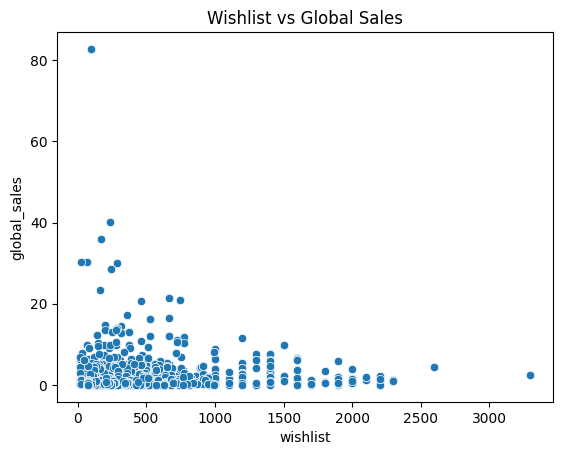

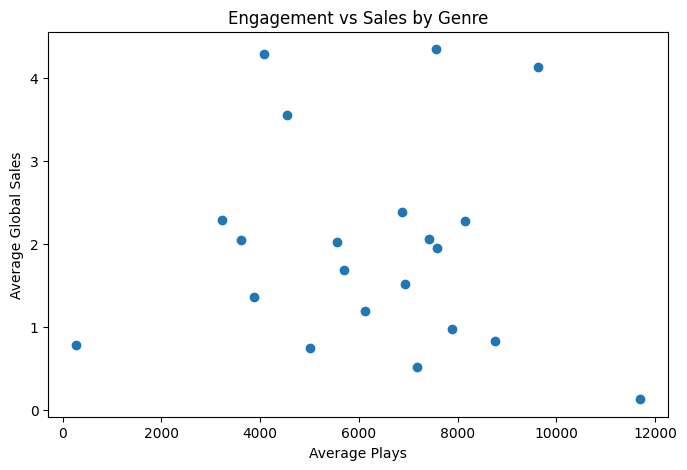

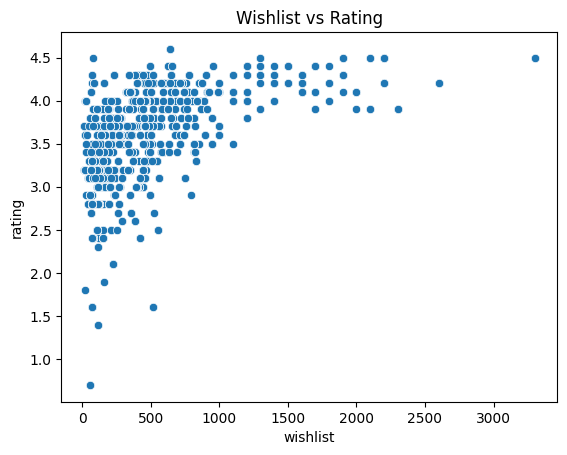

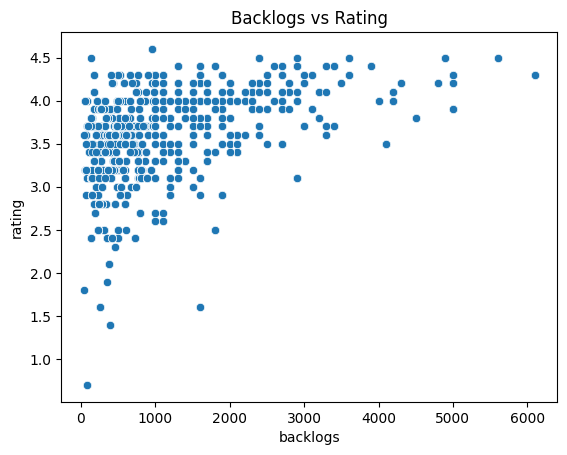

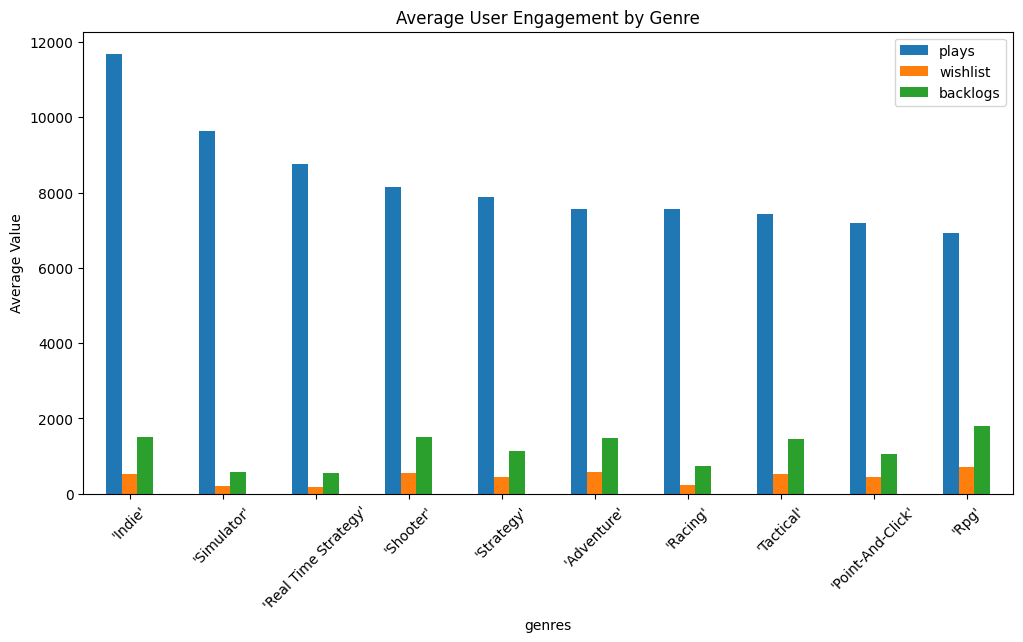

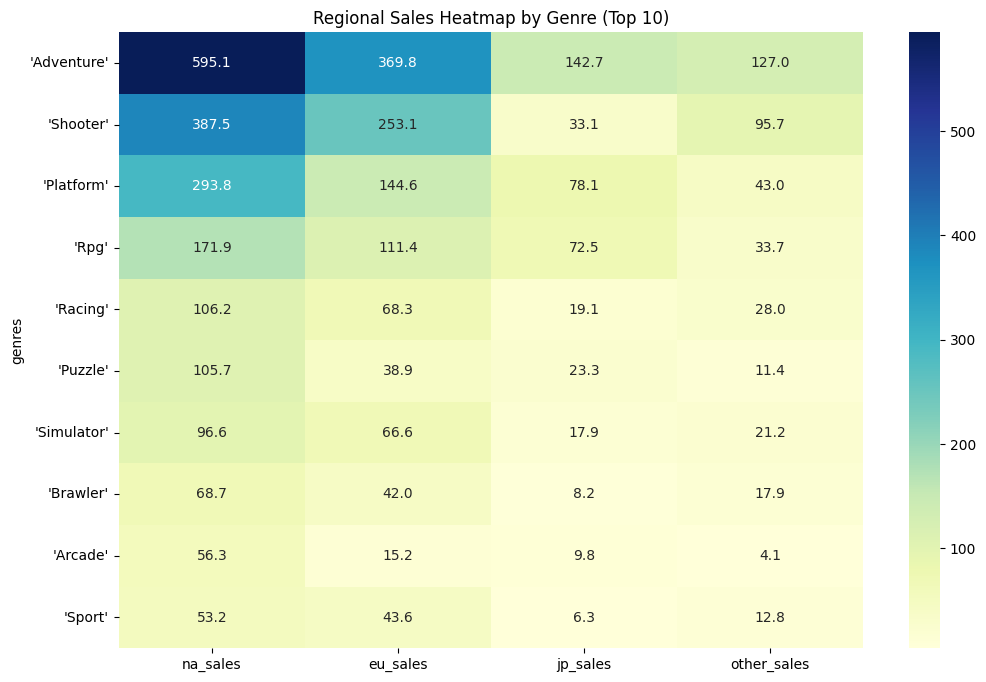

In [16]:
# EDA – MERGED DATASET
# =====================================================

def convert_k_to_num(x):
    if isinstance(x, str):
        x = x.lower().strip()
        if 'k' in x:
            return float(x.replace('k', '')) * 1000
    return pd.to_numeric(x, errors='coerce')

# Apply to your column
merged_df['backlogs'] = merged_df['backlogs'].apply(convert_k_to_num)
merged_df['wishlist'] = merged_df['wishlist'].apply(convert_k_to_num)
merged_df['plays'] = merged_df['plays'].apply(convert_k_to_num)

# Ensure correct datatypes for merged EDA
merged_df['global_sales'] = pd.to_numeric(
    merged_df['global_sales'], errors='coerce'
).fillna(0)

merged_df['rating'] = pd.to_numeric(
    merged_df['rating'], errors='coerce'
)

merged_df['plays'] = pd.to_numeric(
    merged_df['plays'], errors='coerce'
)

merged_df['wishlist'] = pd.to_numeric(
    merged_df['wishlist'], errors='coerce'
)

merged_df['backlogs'] = pd.to_numeric(
    merged_df['backlogs'], errors='coerce'
)

merged_df['genres'] = merged_df['genres'].astype(str).str.strip()

# Ensure release_date is datetime
merged_df['release_year'] = pd.to_datetime(
    merged_df['release_year'], errors='coerce'
)

# -----------------------------------------------------
# Top genres by global sales

genre_sales = (
    merged_df.groupby('genres')['global_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

genre_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top Genres by Global Sales")
plt.ylabel("Global Sales (Millions)")
plt.xlabel("Genre")
plt.show()

# -----------------------------------------------------
# Rating vs Global Sales

sns.scatterplot(
    data=merged_df,
    x='rating',
    y='global_sales'
)
plt.title("Rating vs Global Sales")
plt.show()

# -----------------------------------------------------
# Platforms with most high-rated games

high_rated = merged_df[merged_df['rating'] >= 4]

platform_rating = (
    high_rated.groupby('platform')['title']
    .count()
    .sort_values(ascending=False)
)

platform_rating.plot(kind='line', figsize=(10,5))
plt.title("Platforms with Most High-Rated Games")
plt.ylabel("Number of Games")
plt.xlabel("Platform")
plt.show()

# -----------------------------------------------------
# Release year vs global sales

release_sales = (
    merged_df.dropna(subset=['release_year'])
    .groupby(merged_df['release_year'].dt.year)['global_sales']
    .sum()
)

release_sales.plot(kind='bar', figsize=(10,5))
plt.title("Release Year vs Global Sales")
plt.ylabel("Global Sales")
plt.xlabel("Year")
plt.show()

# -----------------------------------------------------
# Wishlist vs Sales

sns.scatterplot(
    data=merged_df,
    x='wishlist',
    y='global_sales'
)
plt.title("Wishlist vs Global Sales")
plt.show()

# -----------------------------------------------------
# Engagement vs Sales by Genre

engagement_sales = (
    merged_df.groupby('genres')[['plays', 'global_sales']]
    .mean()
)

plt.figure(figsize=(8,5))
plt.scatter(
    engagement_sales['plays'],
    engagement_sales['global_sales']
)
plt.xlabel("Average Plays")
plt.ylabel("Average Global Sales")
plt.title("Engagement vs Sales by Genre")
plt.show()

# -----------------------------------------------------
# Wishlist & Backlogs vs Rating

sns.scatterplot(data=merged_df, x='wishlist', y='rating')
plt.title("Wishlist vs Rating")
plt.show()

sns.scatterplot(data=merged_df, x='backlogs', y='rating')
plt.title("Backlogs vs Rating")
plt.show()

# -----------------------------------------------------
# Engagement across genres (Top 10)

engagement_genre = (
    merged_df.groupby('genres')[['plays', 'wishlist', 'backlogs']]
    .mean()
    .sort_values(by='plays', ascending=False)
    .head(10)
)

engagement_genre.plot(kind='bar', figsize=(12,6))
plt.title("Average User Engagement by Genre")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

# -----------------------------------------------------
# Regional sales heatmap (Top 10 genres)

regional_sales = (
    merged_df.groupby('genres')[['na_sales','eu_sales','jp_sales','other_sales']]
    .sum()
    .sort_values(by='na_sales', ascending=False)
    .head(10)
)

plt.figure(figsize=(12,8))
sns.heatmap(regional_sales, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Regional Sales Heatmap by Genre (Top 10)")
plt.show()

# =====================================================
# END OF Analysis



In [17]:

'''games_df = games_df[games_df['genres'] != ""]
games_df = games_df[games_df['genres'].notna()]'''
games_df.head(20)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release_Year,Backlog_Wishlist_Ratio
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,'Adventure',"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3.8K,4600.0,4800.0,2022,0.958134
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,'Rpg',"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3.8K,4600.0,4800.0,2022,0.958134
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,'Adventure',A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3.2K,6300.0,3600.0,2019,1.749514
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,'Brawler',A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3.2K,6300.0,3600.0,2019,1.749514
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,'Indie',A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3.2K,6300.0,3600.0,2019,1.749514
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,'Rpg',A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3.2K,6300.0,3600.0,2019,1.749514
2,2,The Legend Of Zelda: Breath Of The Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,'Adventure',The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2.5K,5000.0,2600.0,2017,1.922338
2,2,The Legend Of Zelda: Breath Of The Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,'Rpg',The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2.5K,5000.0,2600.0,2017,1.922338
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,'Adventure',"A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679,4900.0,1800.0,2015,2.720711
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,'Indie',"A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679,4900.0,1800.0,2015,2.720711


# New Files Saving For SQL

In [18]:

import re

# Making Column Names SQL Safe
games_df.columns = (
    games_df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

# Remove Empty / Null Genres
# =====================================================
#games_df = games_df[games_df['genres'].notna()]
#games_df = games_df[games_df['genres'] != ""]


vgsales_df.columns = (
    vgsales_df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)


# Remove Quotes from Genres Column
# =====================================================

# (after columns are renamed, it's "genres", not "Genres")

games_df['genres'] = (
    games_df['genres']
    .astype(str)
    .str.replace("'", "", regex=False)
    .str.replace('"', "", regex=False)
    .str.replace('/', "", regex=False)
    .str.replace('[', "", regex=False)
    .str.replace(']', "", regex=False)
    .str.replace(';', "", regex=False)
    .str.strip()
)


# Clean Other Text Columns (Optional but Good)
# =====================================================

text_cols = ['title', 'platform', 'team', "publisher"]

for col in text_cols:
    if col in games_df.columns:
        games_df[col] = (
            games_df[col]
            .astype(str)
            .str.strip()
            .str.title()
        )


# CLEAN TEXT COLUMNS- Remove Hidden Line Breaks (Important for SQL)
# =====================================================

for col in games_df.columns:
    games_df[col] = (
        games_df[col]
        .astype(str)
        .str.replace("\n", " ", regex=False)
        .str.replace(",", " ", regex=False)
        .str.replace("\r", " ", regex=False)
        .str.strip()
    )

# DROP PROBLEM COLUMNS
# =========================
games_df = games_df.drop(columns=["summary", "reviews"], errors="ignore")


# Remove Rows Without Important Info
# =====================================================
#games_df = games_df[games_df['title'] != ""]
#vgsales_df = vgsales_df[games_df['platform'] != ""]

# REMOVE EMPTY TITLES
# =========================
games_df = games_df[games_df["title"].notna()]
games_df = games_df[games_df["title"] != ""]

# Final Data Check
# =====================================================

print("Final Shape:", games_df.shape)
print("Total Missing Values:", games_df.isnull().sum().sum())

'''print("\nSample Data:")
print(games_df.head(20))'''

print("Rows:", len(games_df))
games_df.head(10)

Final Shape: (2688, 14)
Total Missing Values: 0
Rows: 2688


,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,plays,playing,backlogs,wishlist,release_year,backlog_wishlist_ratio
0,0,Elden Ring,2022-02-25,['Bandai Namco Entertainment' 'Fromsoftware'],4.5,3.9K,3.9K,Adventure,17000.0,3.8K,4600.0,4800.0,2022,0.9581337221412206
0,0,Elden Ring,2022-02-25,['Bandai Namco Entertainment' 'Fromsoftware'],4.5,3.9K,3.9K,Rpg,17000.0,3.8K,4600.0,4800.0,2022,0.9581337221412206
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Adventure,21000.0,3.2K,6300.0,3600.0,2019,1.7495140238822549
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Brawler,21000.0,3.2K,6300.0,3600.0,2019,1.7495140238822549
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Indie,21000.0,3.2K,6300.0,3600.0,2019,1.7495140238822549
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Rpg,21000.0,3.2K,6300.0,3600.0,2019,1.7495140238822549
2,2,The Legend Of Zelda: Breath Of The Wild,2017-03-03,['Nintendo' 'Nintendo Epd Production Group No...,4.4,4.3K,4.3K,Adventure,30000.0,2.5K,5000.0,2600.0,2017,1.9223375624759709
2,2,The Legend Of Zelda: Breath Of The Wild,2017-03-03,['Nintendo' 'Nintendo Epd Production Group No...,4.4,4.3K,4.3K,Rpg,30000.0,2.5K,5000.0,2600.0,2017,1.9223375624759709
3,3,Undertale,2015-09-15,['Tobyfox' '8-4'],4.2,3.5K,3.5K,Adventure,28000.0,679,4900.0,1800.0,2015,2.7207107162687394
3,3,Undertale,2015-09-15,['Tobyfox' '8-4'],4.2,3.5K,3.5K,Indie,28000.0,679,4900.0,1800.0,2015,2.7207107162687394


In [19]:
games_df.to_csv(
    "games_clean.csv", 
    index=False,
    encoding="utf-8")

vgsales_df.to_csv("vgsales_clean.csv", index=False)

In [20]:
# Making sure no object-number mix
num_cols = [
    'Rating','Plays','Wishlist','Backlogs',
    'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'
]

for col in num_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce').fillna(0)

# Fix text columns
text_cols = ['Title','Platform','Genres','Team','Publisher']

for col in text_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].astype(str).str.strip()

# Save final dataset
merged_df.to_csv("SQL_games_data.csv", index=False)

print("Final CSV Ready for SQL Upload")


Final CSV Ready for SQL Upload


In [21]:
# ERROR Free Columns Checking -

file_path = r"E:/Analytics PDF/Video Game Sales and Engagement Analysis/games.csv"

df = pd.read_csv(
    file_path,
    encoding="latin1",
    engine="python",
    on_bad_lines="skip"
)

print("Total rows loaded:", len(df))
print("-" * 50)


problem_columns = []


def has_problem(x):

    if pd.isna(x):
        return False

    x = str(x)

    if "\n" in x:
        return True

    if "\r" in x:
        return True

    if '"' in x:
        return True

    if x.count(",") > 10:
        return True

    if len(x) > 500:
        return True

    return False


for col in df.columns:

    bad_count = df[col].apply(has_problem).sum()

    if bad_count > 0:

        problem_columns.append((col, bad_count))

        print(f" {col}  →  {bad_count} bad cells")


print("\nProblem Columns Summary:")
print(problem_columns)


Total rows loaded: 1512
--------------------------------------------------
 Team  →  15 bad cells
 Summary  →  720 bad cells
 Reviews  →  1444 bad cells

Problem Columns Summary:
[('Team', np.int64(15)), ('Summary', np.int64(720)), ('Reviews', np.int64(1444))]
